In [84]:
import math
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import t

In [85]:
jugo_a = [20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23]
jugo_b = [19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18]

In [86]:
# Convertimos en dataframe
df = pd.DataFrame({'Jugo A Vitamina C': jugo_a, 'Jugo B Vitamina C': jugo_b})

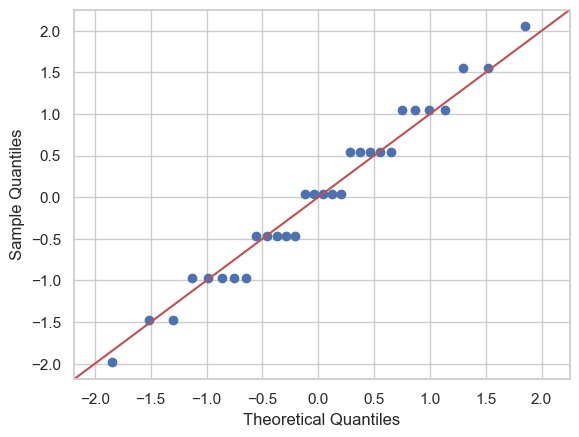

In [87]:
# Calcular la media y desviación estándar para Jugo A Vitamina C
mean_a = df['Jugo A Vitamina C'].mean()
std_a = df['Jugo A Vitamina C'].std()

# Estandarizar los datos manualmente
data_estandarizada_a = [(x - mean_a) / std_a for x in df['Jugo A Vitamina C']]
df_estandarizado_a = pd.DataFrame({'Jugo A Vitamina C Estandarizado': data_estandarizada_a})

# Hacer un QQPlot
figure_a= sm.qqplot(df_estandarizado_a['Jugo A Vitamina C Estandarizado'], line='45')

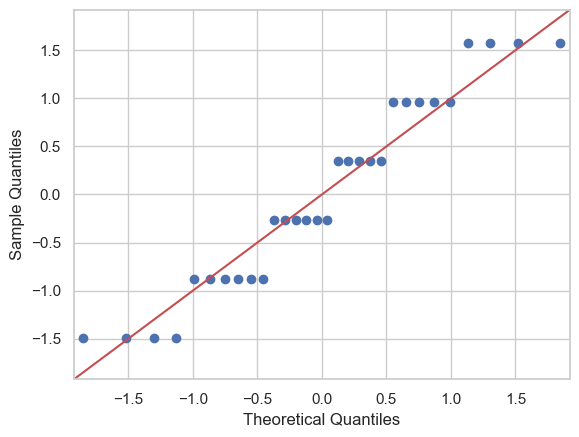

In [88]:
# Calcular la media y desviación estándar para Jugo B Vitamina C
mean_b = df['Jugo B Vitamina C'].mean()
std_b = df['Jugo B Vitamina C'].std()

# Estandarizar los datos manualmente
data_estandarizada_b = [(x - mean_b) / std_b for x in df['Jugo B Vitamina C']]
df_estandarizado_b = pd.DataFrame({'Jugo B Vitamina C Estandarizado': data_estandarizada_b})

# Hacer un QQPlot
figure_b= sm.qqplot(df_estandarizado_b['Jugo B Vitamina C Estandarizado'], line='45')

In [89]:
# Calcular el test de Kolmogorov-Smirnov
D, p_value = stats.ks_2samp(df['Jugo A Vitamina C'], df['Jugo B Vitamina C'])

print("Estadística de prueba (D):", D)
print("Valor p:", p_value)

Estadística de prueba (D): 0.6
Valor p: 2.366488472641374e-05


In [90]:
from scipy.stats import normaltest

# Realizar el test de normalidad para Jugo A
statistic_a, p_value_a = normaltest(df['Jugo A Vitamina C'])

print("Estadística de prueba para Jugo A:", statistic_a)
print("Valor p para Jugo A:", p_value_a)

alpha = 0.05
if p_value_a < alpha:
    print("Rechazamos la hipótesis nula para Jugo A. Los datos no siguen una distribución normal.")
else:
    print("No podemos rechazar la hipótesis nula para Jugo A. Los datos siguen una distribución normal.")

# Realizar el test de normalidad para Jugo B
statistic_b, p_value_b = normaltest(df['Jugo B Vitamina C'])

print("Estadística de prueba para Jugo B:", statistic_b)
print("Valor p para Jugo B:", p_value_b)

if p_value_b < alpha:
    print("Rechazamos la hipótesis nula para Jugo B. Los datos no siguen una distribución normal.")
else:
    print("No podemos rechazar la hipótesis nula para Jugo B. Los datos siguen una distribución normal.")



Estadística de prueba para Jugo A: 0.5941801646670464
Valor p para Jugo A: 0.7429770802381421
No podemos rechazar la hipótesis nula para Jugo A. Los datos siguen una distribución normal.
Estadística de prueba para Jugo B: 4.435097318757388
Valor p para Jugo B: 0.10887567333198282
No podemos rechazar la hipótesis nula para Jugo B. Los datos siguen una distribución normal.


In [92]:
# Nivel de confianza
nivel_confianza = 0.95

# Tamaño de la muestra
n = len(df)

# Calcular el valor crítico de t
valor_critico = t.ppf((1 + nivel_confianza) / 2, df=n - 1)

# Calcular los intervalos de confianza para ambos jugos
intervalo_confianza_jugo_a = (df['Jugo A Vitamina C'].mean() - valor_critico * (df['Jugo A Vitamina C'].std() / (n ** 0.5)),
                              df['Jugo A Vitamina C'].mean() + valor_critico * (df['Jugo A Vitamina C'].std() / (n ** 0.5)))

intervalo_confianza_jugo_b = (df['Jugo B Vitamina C'].mean() - valor_critico * (df['Jugo B Vitamina C'].std() / (n ** 0.5)),
                              df['Jugo B Vitamina C'].mean() + valor_critico * (df['Jugo B Vitamina C'].std() / (n ** 0.5)))

print("Intervalo de Confianza para Jugo A:", intervalo_confianza_jugo_a)
print("Intervalo de Confianza para Jugo B:", intervalo_confianza_jugo_b)

Intervalo de Confianza para Jugo A: (23.193420166339706, 24.67324650032696)
Intervalo de Confianza para Jugo B: (19.82343226369393, 21.043234402972736)
